https://doi.org/10.60669/8fya-7x87 

In [59]:
import requests
import pandas as pd
import numpy as np
import pvlib
from pvlib.pvsystem import PVSystem, Array, FixedMount
from pvlib.location import Location
from pvlib.modelchain import ModelChain

In [2]:
# Get Metadata
meta_url = 'https://dataset.api.hub.geosphere.at/v1/station/historical/klima-v2-10min/metadata'
meta_response = requests.get(meta_url)
stations_meta_df = pd.DataFrame.from_dict(meta_response.json()['stations']).set_index('id')
parameter_meta_df = pd.DataFrame.from_dict(meta_response.json()['parameters']).set_index('name')

In [3]:
# specify parameters
station = 171 # B 11104 # DO 171 # DO: 11112
start   = '2021-01-01'
end     = '2022-01-01'

In [4]:
station_meta = stations_meta_df.loc[station, :].to_dict()

In [5]:
parameters = [
    'TL', # Lufttemperatur 2m,"Lufttemperatur in 2m Höhe, 10-Minuten-Messwert",°C
    'CGLO', # Globalstrahlung Mittelwert,"Globalstrahlung, kalibriert, Mittelwert",W/m²
    'CHIM', # Himmelsstrahlung Mittelwert,"Diffusstrahlung, nicht geprüft, kalibriert, Mittelwert",W/m²
    'RF', # Relative Feuchte,"Relative Feuchte, 10-Minuten-Messwert",%
    'P', # Luftdruck,"Luftdruck, 10-Minuten-Messwert",hPa
    'FF',  # "Windgeschwindigkeit 10m, vektorieller Mittelwert","Windgeschwindigkeit in 10m Höhe, vektorieller 10-Minuten-Mittelwert",m/s
    ]


url = f'https://dataset.api.hub.geosphere.at/v1/station/historical/klima-v2-10min?parameters={",".join(parameters)}&station_ids={station}&start={start}&end={end}'
response = requests.get(url)
response_dict = response.json()

timestamp = response_dict['timestamps']
columns = []
data = []
for key, values in response_dict['features'][0]['properties']['parameters'].items():
    columns.append(values['name']+' in '+values['unit'])
    data.append(values['data'])

df = pd.DataFrame(data=np.array(data).T, index=pd.to_datetime(timestamp), columns=columns)

<Axes: >

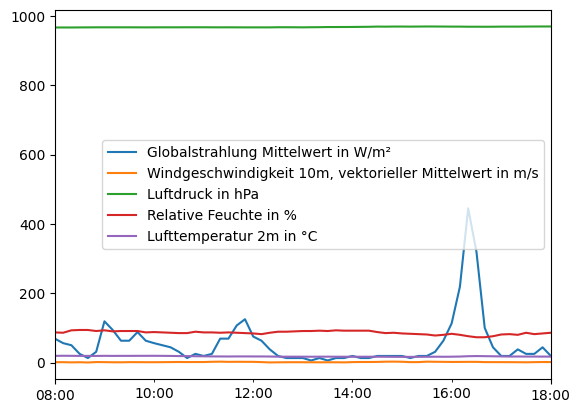

In [6]:
df.loc['2021-08-16 08:00':'2021-08-16 18:00'].plot()

In [7]:
df.to_pickle('data/ZAMG_weather/Dornbirn_2021.pkl')

In [12]:
solarpos = pvlib.solarposition.get_solarposition(df.index, station_meta['lat'], station_meta['lon'], station_meta['altitude'])

In [38]:
df

,Globalstrahlung Mittelwert in W/m²,Himmelsstrahlung Mittelwert in W/m²,"Windgeschwindigkeit 10m, vektorieller Mittelwert in m/s",Luftdruck in hPa,Relative Feuchte in %,Lufttemperatur 2m in °C
2021-01-01 00:00:00+00:00,0,None,0.4,956.3,91,-1.3
2021-01-01 00:10:00+00:00,0,None,0.4,956.3,91,-1.3
2021-01-01 00:20:00+00:00,0,None,0.6,956.2,92,-1.4
2021-01-01 00:30:00+00:00,0,None,0.5,956.3,91,-1.7
2021-01-01 00:40:00+00:00,0,None,0.4,956.2,90,-1.5
...,...,...,...,...,...,...
2021-12-31 23:20:00+00:00,0,None,1.0,980.0,96,3.2
2021-12-31 23:30:00+00:00,0,None,0.9,979.9,95,3.1
2021-12-31 23:40:00+00:00,0,None,1.1,980.0,95,2.9
2021-12-31 23:50:00+00:00,0,None,0.4,980.0,95,3.1


In [80]:
# complete irradiation data using the Erbs model: https://pvlib-python.readthedocs.io/en/stable/reference/generated/pvlib.irradiance.erbs.html#id1 / https://doi.org/10.1016/0038-092X(82)90302-4 
dnidhi = pvlib.irradiance.erbs(df['Globalstrahlung Mittelwert in W/m²'], solarpos['zenith'], df.index).drop('kt', axis=1)

solarweather = dnidhi.join(df.loc[:, ['Globalstrahlung Mittelwert in W/m²', 'Windgeschwindigkeit 10m, vektorieller Mittelwert in m/s', 'Lufttemperatur 2m in °C']])
solarweather.rename({'Globalstrahlung Mittelwert in W/m²': 'ghi',
                     'Windgeschwindigkeit 10m, vektorieller Mittelwert in m/s': 'wind_speed',
                     'Lufttemperatur 2m in °C': 'temp_air'
                     }, axis=1, inplace=True)
solarweather.fillna(0, inplace=True)

C:\Users\seva\AppData\Local\Temp\ipykernel_2300\1765121486.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  solarweather.fillna(0, inplace=True)


In [81]:
solarweather

,dni,dhi,ghi,wind_speed,temp_air
2021-01-01 00:00:00+00:00,0,0,0,0.4,-1.3
2021-01-01 00:10:00+00:00,0,0,0,0.4,-1.3
2021-01-01 00:20:00+00:00,0,0,0,0.6,-1.4
2021-01-01 00:30:00+00:00,0,0,0,0.5,-1.7
2021-01-01 00:40:00+00:00,0,0,0,0.4,-1.5
...,...,...,...,...,...
2021-12-31 23:20:00+00:00,0,0,0,1.0,3.2
2021-12-31 23:30:00+00:00,0,0,0,0.9,3.1
2021-12-31 23:40:00+00:00,0,0,0,1.1,2.9
2021-12-31 23:50:00+00:00,0,0,0,0.4,3.1


In [101]:
sapm_inverters['iPower__SHO_5_2__240V_']

Vac                          240
Pso                    62.486748
Paco                      5200.0
Pdco                 5382.856934
Vdco                       280.0
C0                     -0.000005
C1                      0.000044
C2                       0.00126
C3                      0.000367
Pnt                         1.56
Vdcmax                     400.0
Idcmax                 19.224489
Mppt_low                   240.0
Mppt_high                  400.0
CEC_Date                     NaN
CEC_Type     Utility Interactive
Name: iPower__SHO_5_2__240V_, dtype: object

In [97]:
sandia_modules

,Advent_Solar_AS160___2006_,Advent_Solar_Ventura_210___2008_,Advent_Solar_Ventura_215___2009_,Aleo_S03_160__2007__E__,Aleo_S03_165__2007__E__,Aleo_S16_165__2007__E__,Aleo_S16_170__2007__E__,Aleo_S16_175__2007__E__,Aleo_S16_180__2007__E__,Aleo_S16_185__2007__E__,...,Panasonic_VBHN235SA06B__2013_,Trina_TSM_240PA05__2013_,Hanwha_HSL60P6_PA_4_250T__2013_,Suniva_OPT300_72_4_100__2013_,Canadian_Solar_CS6X_300M__2013_,LG_LG290N1C_G3__2013_,Sharp_NDQ235F4__2013_,Solar_Frontier_SF_160S__2013_,SolarWorld_Sunmodule_250_Poly__2013_,Silevo_Triex_U300_Black__2014_
Vintage,2006,2008,2009,2007 (E),2007 (E),2007 (E),2007 (E),2007 (E),2007 (E),2007 (E),...,2013,2013,2013,2013,2013,2013,2013,2013,2013,2014
Area,1.312,1.646,1.646,1.28,1.28,1.378,1.378,1.378,1.378,1.378,...,1.26,1.63,1.65,1.93,1.91,1.64,1.56,1.22,1.68,1.68
Material,mc-Si,mc-Si,mc-Si,c-Si,c-Si,mc-Si,mc-Si,mc-Si,mc-Si,mc-Si,...,a-Si / mono-Si,mc-Si,mc-Si,c-Si,c-Si,c-Si,mc-Si,CIS,mc-Si,c-Si
Cells_in_Series,72,60,60,72,72,50,50,50,50,50,...,72,60,60,72,72,60,60,172,60,96
Parallel_Strings,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Isco,5.564,8.34,8.49,5.1,5.2,7.9,7.95,8.1,8.15,8.2,...,5.8738,8.8449,8.5935,8.5753,8.6388,9.8525,8.6739,2.0259,8.3768,5.771
Voco,42.832,35.31,35.92,43.5,43.6,30.0,30.1,30.2,30.3,30.5,...,52.0042,36.8926,36.8075,44.2921,43.5918,39.6117,36.8276,112.5048,36.3806,68.5983
Impo,5.028,7.49,7.74,4.55,4.65,7.08,7.23,7.38,7.53,7.67,...,5.5383,8.2955,8.0822,7.963,8.1359,9.2473,8.1243,1.8356,7.6921,5.383
Vmpo,32.41,27.61,27.92,35.6,35.8,23.3,23.5,23.7,23.9,24.1,...,43.1204,29.066,29.2011,35.0837,34.9531,31.2921,29.1988,86.6752,28.348,55.4547
Aisc,0.000537,0.00077,0.00082,0.0003,0.0003,0.0008,0.0008,0.0008,0.0008,0.0008,...,0.0005,0.0004,0.0004,0.0006,0.0005,0.0002,0.0006,0.0001,0.0006,0.0003


In [104]:
module

Vintage                                                          2009
Area                                                            1.701
Material                                                         c-Si
Cells_in_Series                                                    96
Parallel_Strings                                                    1
Isco                                                          5.09115
Voco                                                          59.2608
Impo                                                          4.54629
Vmpo                                                          48.3156
Aisc                                                         0.000397
Aimp                                                         0.000181
C0                                                            1.01284
C1                                                           -0.01284
Bvoco                                                        -0.21696
Mbvoc               

In [146]:

sandia_modules = pvlib.pvsystem.retrieve_sam('SandiaMod')

sapm_inverters = pvlib.pvsystem.retrieve_sam('cecinverter')

module = sandia_modules['Canadian_Solar_CS5P_220M___2009_']

inverter = sapm_inverters['iPower__SHO_5_2__240V_']

temperature_model_parameters = pvlib.temperature.TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

location = Location(
    latitude=station_meta['lat'],
    longitude=station_meta['lon'],
    name='Dornbirn',
    altitude=station_meta['altitude'],
)

mount = FixedMount(
    surface_tilt=45, 
    surface_azimuth=180
    )
array = Array(
    mount=mount,
    module_parameters=module,
    temperature_model_parameters=temperature_model_parameters,
    modules_per_string=2,
    strings=1,
)
system = PVSystem(arrays=[array], inverter_parameters=inverter)
mc = ModelChain(system, location)
# mc.run_model(pd.DataFrame(solarweather.loc[pd.to_datetime('2021-12-31 23:20:00+00:00'):pd.to_datetime('2021-12-31 23:30:00+00:00')]).T)
mc.run_model(solarweather.loc[pd.to_datetime('2021-12-31 23:20:00+00:00'):pd.to_datetime('2021-12-31 23:30:00+00:00')])

ModelChain: 
  name: None
  clearsky_model: ineichen
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: sapm
  ac_model: sandia_inverter
  aoi_model: sapm_aoi_loss
  spectral_model: sapm_spectral_loss
  temperature_model: sapm_temp
  losses_model: no_extra_losses

In [136]:
class PVModelPVLIB():
    def __init__(self,
            name,
            latitude=station_meta['lat'],
            longitude=station_meta['lon'],
            altitude=station_meta['altitude'],
            surface_tilt=45,
            surface_azimuth=180,
            modules_per_string=2,
            strings=1,
            ):
        
        sandia_modules = pvlib.pvsystem.retrieve_sam('SandiaMod')
        module = sandia_modules['Canadian_Solar_CS5P_220M___2009_']

        sapm_inverters = pvlib.pvsystem.retrieve_sam('cecinverter')
        inverter = sapm_inverters['iPower__SHO_5_2__240V_']

        temperature_model_parameters = pvlib.temperature.TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

        location = Location(
            latitude=latitude,
            longitude=longitude,
            name=name,
            altitude=altitude,
            )
        mount = FixedMount(
            surface_tilt=surface_tilt, 
            surface_azimuth=surface_azimuth
            )
        array = Array(
            mount=mount,
            module_parameters=module,
            temperature_model_parameters=temperature_model_parameters,
            modules_per_string=modules_per_string,
            strings=strings,
            )
        system = PVSystem(arrays=[array], inverter_parameters=inverter)

        self.modelchain = ModelChain(system, location)

    def step(self, time):
        print(pd.DataFrame(solarweather.loc[time, :]).T.columns)
        return mc.run_model(pd.DataFrame(solarweather.loc[time, :]).T).results.ac.to_dict()

In [ ]:
# AOI loss, spectral loss, effective irradiance, cell temperature, DC power, AC power, and other losses

# location
latitude = 50
longitude = 30
altitude = 420
timezone = 'UTC+1'


system['surface_tilt'] = latitude

solpos = pvlib.solarposition.get_solarposition(
    time=weather.index,
    latitude=latitude,
    longitude=longitude,
    altitude=altitude,
    temperature=weather["temp_air"],
    pressure=pvlib.atmosphere.alt2pres(altitude),
)
dni_extra = pvlib.irradiance.get_extra_radiation(weather.index)
airmass = pvlib.atmosphere.get_relative_airmass(solpos['apparent_zenith'])
pressure = pvlib.atmosphere.alt2pres(altitude)
am_abs = pvlib.atmosphere.get_absolute_airmass(airmass, pressure)

aoi = pvlib.irradiance.aoi(
    system['surface_tilt'],
    system['surface_azimuth'],
    solpos["apparent_zenith"],
    solpos["azimuth"],
)

total_irradiance = pvlib.irradiance.get_total_irradiance(
    system['surface_tilt'],
    system['surface_azimuth'],
    solpos['apparent_zenith'],
    solpos['azimuth'],
    weather['dni'],
    weather['ghi'],
    weather['dhi'],
    dni_extra=dni_extra,
    model='haydavies',
)

iam = pvlib.iam.martin_ruiz(aoi)

cell_temperature = pvlib.temperature.faiman( # Checked
    total_irradiance['poa_global'],
    weather["temp_air"],
    weather["wind_speed"],
)
effective_irradiance = pvlib.pvsystem.sapm_effective_irradiance(
    total_irradiance['poa_direct'],
    total_irradiance['poa_diffuse'],
    am_abs,
    aoi,
    module,
)

dc = pvlib.pvarray.huld(effective_irradiance, cell_temperature, pdc0=20000, cell_type='cSi') # Checked (But check cSi!!)

ac = pvlib.inverter.sandia(dc['v_mp'], dc['p_mp'], inverter)
annual_energy

In [147]:
pvlib.temperature.TEMPERATURE_MODEL_PARAMETERS

{'sapm': {'open_rack_glass_glass': {'a': -3.47, 'b': -0.0594, 'deltaT': 3},
  'close_mount_glass_glass': {'a': -2.98, 'b': -0.0471, 'deltaT': 1},
  'open_rack_glass_polymer': {'a': -3.56, 'b': -0.075, 'deltaT': 3},
  'insulated_back_glass_polymer': {'a': -2.81, 'b': -0.0455, 'deltaT': 0}},
 'pvsyst': {'freestanding': {'u_c': 29.0, 'u_v': 0},
  'insulated': {'u_c': 15.0, 'u_v': 0}}}

In [161]:
# PVWatts https://pvwatts.nrel.gov/downloads/pvwattsv5.pdf

# PV params
P_dc_pv_nom = 20_000 # W
gamma_pdc = -0.003 # 1/°C

# Inverter Params
P_dc_inv_nom = 25_0000 # W



# # Weather Data
# poa_global = 5 # W/m^2
# v_wind = 0.2 # m/s


G_poa_eff = 1000 # Irradiance transmitted to the PV cells. To be fully consistent with PVWatts, the user must have already applied angle of incidence losses, but not soiling, spectral, etc. [W/m^2]
T_cell = 20 # °C # PVWatts uses the fuentes model here

P_dc = pvlib.pvsystem.pvwatts_dc(G_poa_eff, T_cell, P_dc_pv_nom, gamma_pdc, temp_ref=25.0)

P_ac = pvlib.inverter.pvwatts(P_dc, P_dc_inv_nom)

P_dc, P_ac

(20299.999999999996, np.float64(18438.969705593023))

In [153]:
P_dc

101.49999999999999